In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
playerdata_1718season = '.\playerstatsbygame_20172018_regularseason.csv'
playerseason_data = '.\Seasons_Stats.csv'
salarydata = './nba_salaries_1990_to_2018.csv'
rpm_data = './RPM_data.xlsx'

In [3]:
playerstats_1718 = pd.read_csv(playerdata_1718season)
playerseasondata = pd.read_csv(playerseason_data)
salarydata = pd.read_csv(salarydata)
rpmdata = pd.read_excel(rpm_data, sheet_name='Agg')

In [5]:
print(salarydata.columns)
print(playerseasondata.columns)

playerseasondata.groupby('Tm').count()

# Teams on stats data & salary data don't quite line up due to teams relocating/renaming. Remapping team names in next cell.

Index(['player', 'salary', 'season_end', 'season_start', 'team', 'team_name'], dtype='object')
Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


Unnamed: 0  Year  Player   Pos   Age     G    GS    MP   PER   TS%  ...   \
Tm                                                                       ...    
AND          16    16      16    16    16    16     0     0     0    16  ...    
ATL         788   788     788   788   788   788   609   788   788   783  ...    
BAL         144   144     144   144   144   144     0   144   144   144  ...    
BLB          95    95      95    95    95    95     0    55    50    95  ...    
BOS         998   998     998   998   998   998   616   966   966   997  ...    
BRK          93    93      93    93    93    93    93    93    92    92  ...    
BUF         120   120     120   120   120   120     0   120   120   119  ...    
CAP          14    14      14    14    14    14     0    14    14    14  ...    
CHA         183   183     183   183   183   183   183   183   183   180  ...    
CHH         243   243     243   243   243   243   243   243   243   239  ...    
CHI         795   795     795   795   795   795   580   795   795   789  ...    
CHO          53    53      53    53    53    53    53    53    53    53  ...    
CHP          12    12      12    12    12    12     0    12    12    12  ...    
CHS          13    13      13    13    13    13     0     0     0    13  ...    
CHZ          17    17      17    17    17    17     0    17    17    17  ...    
CIN         198   198     198   198   198   198     0   198   198   198  ...    
CLE         783   783     783   783   783   783   624   783   783   779  ...    
DAL         619   619     619   619   619   619   598   619   619   615  ...    
DEN         672   672     672   672   672   672   599   672   672   671  ...    
DET         917   917     917   917   917   917   570   917   917   915  ...    
DNN          15    15      15    15    15    15     0     0     0    15  ...    
FTW         106   106     106   106   105   106     0    76    76   106  ...    
GSW         757   757     757   757   757   757   624   757   756   752  ...    
HOU         745   745     745   745   745   745   599   745   744   741  ...    
IND         625   625     625   625   625   625   549   625   625   623  ...    
INO          51    51      51    51    51    51     0    24    24    51  ...    
KCK         144   144     144   144   144   144    61   144   144   144  ...    
KCO          48    48      48    48    48    48     0    48    48    47  ...    
LAC         567   567     567   567   567   567   567   567   566   564  ...    
LAL         834   834     834   834   834   834   553   834   834   834  ...    
..          ...   ...     ...   ...   ...   ...   ...   ...   ...   ...  ...    
NOK          34    34      34    34    34    34    34    34    34    34  ...    
NOP          89    89      89    89    89    89    89    89    89    88  ...    
NYK        1043  1043    1043  1043  1043  1043   589  1017  1017  1041  ...    
NYN          18    18      18    18    18    18     0    18    18    18  ...    
OKC         163   163     163   163   163   163   163   163   163   163  ...    
ORL         469   469     469   469   469   469   469   469   469   469  ...    
PHI         871   871     871   871   871   871   621   871   871   867  ...    
PHO         764   764     764   764   764   764   598   764   764   761  ...    
PHW         164   164     164   164   163   164     0   136   136   163  ...    
POR         724   724     724   724   724   724   569   724   724   723  ...    
ROC          91    91      91    91    90    91     0    68    68    91  ...    
SAC         527   527     527   527   527   527   527   527   527   526  ...    
SAS         689   689     689   689   689   689   620   689   688   686  ...    
SDC          95    95      95    95    95    95    51    95    95    94  ...    
SDR          51    51      51    51    51    51     0    51    51    51  ...    
SEA         606   606     606   606   606   606   411   606   606   606  ...    
SFW         120   120     120   120 

In [6]:
team_map = {'ATL': 'ATL','BOS': 'BOS','BRK': 'NJN','CHA': 'CHA','CHH': 'CHA','CHI': 'CHI','CHO': 'CHA',
'CLE': 'CLE','DAL': 'DAL','DEN': 'DEN','DET': 'DET','GSW': 'GSW','HOU': 'HOU','IND': 'IND','LAC': 'LAC',
'LAL': 'LAL','MEM': 'MEM','MIA': 'MIA','MIL': 'MIL','MIN': 'MIN','NJN': 'NJN','NOH': 'NOH','NOK': 'NOH',
'NOP': 'NOP','NYK': 'NYK','OKC': 'OKC','ORL': 'ORL','PHI': 'PHI','PHO': 'PHO','POR': 'POR','SAC': 'SAC',
'SAS': 'SAS','SEA': 'SEA','TOR': 'TOR','TOT': 'TOT','UTA': 'UTA','VAN': 'MEM','WAS': 'WAS','WSB': 'WAS'}

playerseasondata['Tm'] = playerseasondata['Tm'].map(team_map)

In [7]:
# combine salary data (1990 - 2017 season end) with stats for one giant player table
# Note, each year is the season end year
# Combine based on player, season, & team (players may have played on >1 team in a season, so this makes sure we join right)

stats = playerseasondata.loc[playerseasondata.loc[:, 'Year'] >= 1990, :]
salary = salarydata.loc[salarydata.loc[:, 'season_end'] <=2017, :]
data = stats.merge(salary, left_on=['Player', 'Year', 'Tm' ], right_on = ['player', 'season_end', 'team'], how='outer')

#get rid of columns I don't want/duplicates and rename existing for clarity

data.drop(['Unnamed: 0','3PAr', 'blank2',
 'blanl', 'BPM', 'DBPM', 'eFG%', 'FTr', 'OBPM', 'team_name', 'VORP', 'WS/48'], axis=1, inplace=True)

data.rename(columns={ '2PA':'2PAttempt', '2P':'2PMade', '2P%':'2Pt%', '3P%':'3Pt%',
 '3PA':'3PtAttempt', '3P':'3PtMade', 'Age':'Age_seasonEnd', 'AST%':'Assist%',
 'AST':'Assists', 'BLK%':'Block%', 'BLK':'Blocks', 'DRB%':'Drebound%',
 'DRB':'Drebounds', 'DWS': 'Dwinshares', 'FG%':'FG%', 'FGA':'Fgattempt', 'FG':'Fgmade',
 'FT%':'FT%', 'FTA':'FTAttempt', 'FT':'FTMade', 'G':'Games',
 'GS':'GamesStarted', 'MP':'MinPlayed', 'ORB':'Offrb', 'ORB%':'OffRb%',
 'OWS': 'OffWinShares', 'PER':'PER', 'PF':'PersonalFouls', 'Player':'Player', 'player':'player',
 'Pos':'Position', 'PTS':'Pts', 'salary':'Salary', 'season_end':'Season_End',
 'season_start':'Season_Start', 'STL%':'Steal%', 'STL':'Steals',
 'team':'Team', 'Tm': 'Stats_Team', 'TRB%':'TotalRbnd%', 'TRB':'TotalRbnds',
 'TS%':'TS%', 'TOV':'Turnover', 'TOV%':'Turnover%','USG%':'Usg%', 'WS':'WinShares', 'Year': 'Stats_SeasonEnd'}, inplace=True)

In [8]:
data.groupby('Team').count()

team_list = data['Team'].unique()
team_list

team_fullnames = {'LAL': 'LA Lakers', 'PHO': 'Phoenix Suns' , 'DAL':'Dallas Mavericks' , 
                  'MIA': 'Miami Heat', 'CLE': 'Cleveland Cavaliers', 'WAS': 'Washington Wizards',
                  'CHI': 'Chicago Bulls', 'GSW': 'Golden State Warriors', 'IND': 'Indiana Pacers',
                  'BOS': 'Boston Celtics', 'HOU': 'Houston Rockets', 'SAC': 'Sacramento Kings',
                  'ORL': 'Orlando Magic', 'NOH': 'New Orleans Pelicans/Hornets', 'TOR': 'Toronto Raptors',
                  'CHA': 'Charlotte Hornets', 'POR': 'Portland Trailblazers', 'DET': 'Detroit Pistons',
                  'PHI': 'Philadelphia 76ers', 'MIL': 'Milwaukee Bucks', 'DEN': 'Denver Nuggets', 
                  'OKC': 'OKC Thunder', 'NJN': 'Brooklyn Nets', 'LAC': 'Los Angeles Clippers', 'ATL': 'Atlanta Hawks', 
                  'MEM': 'Memphis Grizzlies', 'UTA': 'Utah Jazz','MIN': 'Minnesota Timberwolves', 'NYK': 'New York Knicks',
                  'SAS': 'San Antonio Spurs'}
#data.groupby('Stats_Team').count()


Basic EDA

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with salary

In [9]:
print("Shape:", data.shape, '\n')
print("Types:", data.dtypes, '\n')
print("Null counts:", data.isnull().sum(), '\n')

Shape: (16564, 47) 

Types: Stats_SeasonEnd    float64
Player              object
Position            object
Age_seasonEnd      float64
Stats_Team          object
Games              float64
GamesStarted       float64
MinPlayed          float64
PER                float64
TS%                float64
OffRb%             float64
Drebound%          float64
TotalRbnd%         float64
Assist%            float64
Steal%             float64
Block%             float64
Turnover%          float64
Usg%               float64
OffWinShares       float64
Dwinshares         float64
WinShares          float64
Fgmade             float64
Fgattempt          float64
FG%                float64
3PtMade            float64
3PtAttempt         float64
3Pt%               float64
2PMade             float64
2PAttempt          float64
2Pt%               float64
FTMade             float64
FTAttempt          float64
FT%                float64
Offrb              float64
Drebounds          float64
TotalRbnds         float64


In [10]:
data.describe()

Stats_SeasonEnd  Age_seasonEnd         Games  GamesStarted  \
count     15118.000000   15118.000000  15118.000000  15118.000000   
mean       2004.209353      26.980553     48.357587     23.120188   
std           8.001655       4.149695     26.479912     28.265724   
min        1990.000000      18.000000      1.000000      0.000000   
25%        1997.000000      24.000000     25.000000      0.000000   
50%        2005.000000      26.000000     52.000000      8.000000   
75%        2011.000000      30.000000     74.000000     43.000000   
max        2017.000000      44.000000     85.000000     83.000000   

          MinPlayed           PER           TS%        OffRb%     Drebound%  \
count  15118.000000  15113.000000  15047.000000  15113.000000  15113.000000   
mean    1131.563368     12.410117      0.503103      6.016198     13.961517   
std      916.681726      6.289565      0.096247      5.078080      6.580256   
min        0.000000    -90.600000      0.000000      0.000000      0.000000   
25%      292.000000      9.600000      0.471000      2.300000      9.200000   
50%      941.000000     12.600000      0.516000      4.900000     13.000000   
75%     1837.750000     15.600000      0.551000      8.900000     18.100000   
max     3533.000000    129.100000      1.136000    100.000000    100.000000   

         TotalRbnd%      ...         TotalRbnds       Assists        Steals  \
count  15113.000000      ...       15118.000000  15118.000000  15118.000000   
mean       9.991120      ...         196.866980    104.142942     36.836023   
std        5.092914      ...         196.626964    132.325284     36.084235   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        6.100000      ...          44.000000     15.000000      8.000000   
50%        9.100000      ...         139.000000     56.000000     27.000000   
75%       13.400000      ...         286.000000    141.000000     55.000000   
max      100.000000      ...        1530.000000   1164.000000    246.000000   

             Blocks      Turnover  PersonalFouls           Pts        Salary  \
count  15118.000000  15118.000000   15118.000000  15118.000000  1.132600e+04   
mean      23.109141     67.293888     101.988954    463.030956  3.283038e+06   
std       34.769813     63.033556      76.958718    463.363817  4.106295e+06   
min        0.000000      0.000000       0.000000      0.000000  2.706000e+03   
25%        3.000000     16.000000      32.000000     87.000000  7.500000e+05   
50%       11.000000     50.000000      92.000000    317.000000  1.670000e+06   
75%       28.000000    102.000000     159.000000    714.000000  4.010004e+06   
max      376.000000    464.000000     371.000000   2832.000000  3.314000e+07   

         Season_End  Season_Start  
count  11326.000000  11326.000000  
mean    2004.851934   2003.851934  
std        7.890513      7.890513  
min     1991.000000   1990.000000  
25%     1998.000000   1997.000000  
50%     2005.000000   2004.000000  
75%     2012.000000   2011.000000  
max     2017.000000   2016.000000  

[8 rows x 42 columns]

In [11]:
for col in data.columns:
    print(col, data.loc[:, col].nunique())

Stats_SeasonEnd 28
Player 2290
Position 16
Age_seasonEnd 27
Stats_Team 33
Games 85
GamesStarted 84
MinPlayed 3140
PER 512
TS% 570
OffRb% 291
Drebound% 392
TotalRbnd% 304
Assist% 507
Steal% 107
Block% 127
Turnover% 388
Usg% 394
OffWinShares 167
Dwinshares 87
WinShares 197
Fgmade 799
Fgattempt 1515
FG% 468
3PtMade 240
3PtAttempt 552
3Pt% 398
2PMade 738
2PAttempt 1333
2Pt% 458
FTMade 568
FTAttempt 696
FT% 626
Offrb 350
Drebounds 700
TotalRbnds 939
Assists 711
Steals 217
Blocks 256
Turnover 322
PersonalFouls 331
Pts 1844
player 2161
Salary 5222
Season_End 27
Season_Start 27
Team 30


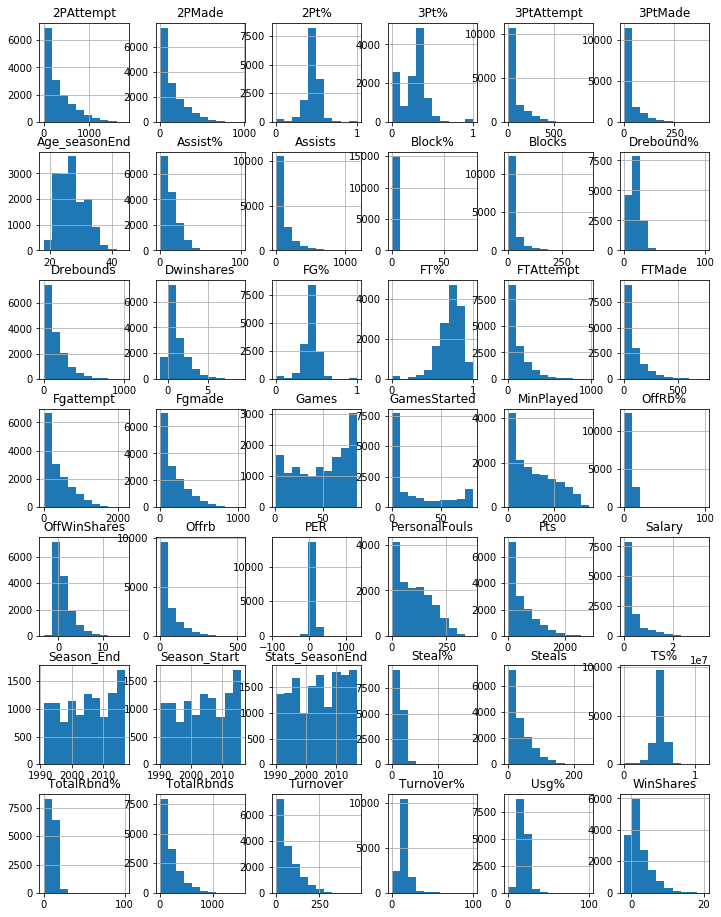

In [12]:
data.hist(figsize=(12,16));

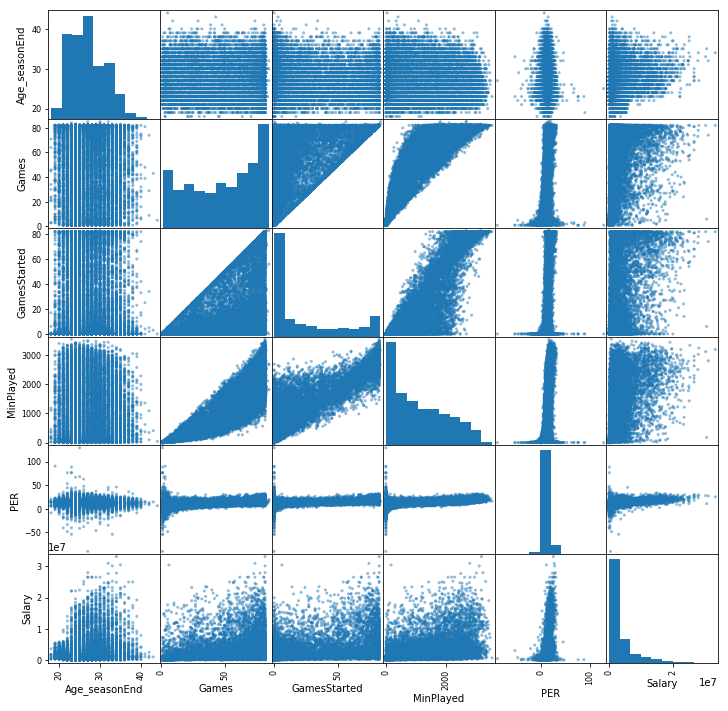

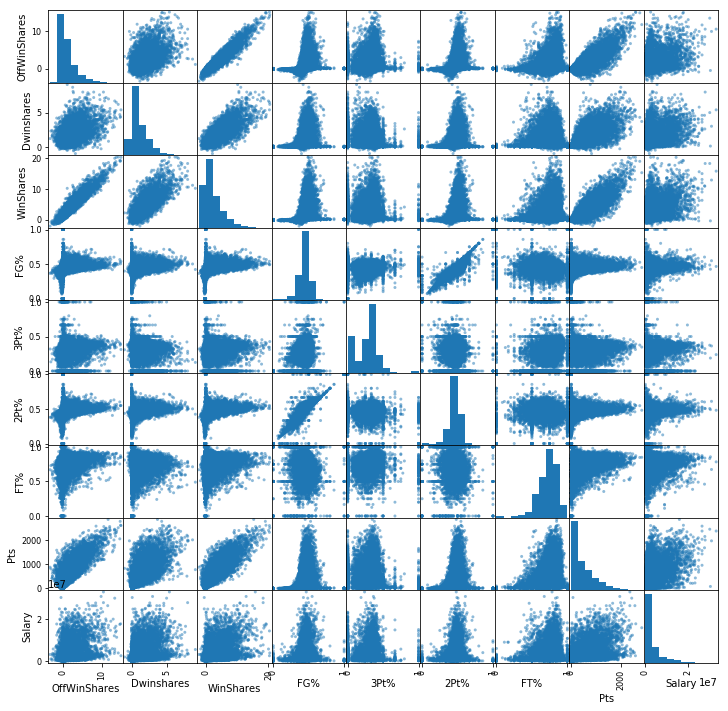

In [13]:
list(data.columns)

stats_features = [ 'Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'TS%', 'OffRb%', 'Drebound%', 'TotalRbnd%', 'Assist%',
 'Steal%', 'Block%', 'Turnover%', 'Usg%', 'OffWinShares', 'Dwinshares', 'WinShares',
 'Fgmade', 'Fgattempt', 'FG%', '3PtMade', '3PtAttempt', '3Pt%', '2PMade', '2PAttempt',
 '2Pt%', 'FTMade', 'FTAttempt', 'FT%', 'Offrb', 'Drebounds', 'TotalRbnds', 'Assists',
 'Steals', 'Blocks', 'Turnover', 'PersonalFouls', 'Pts', 'Salary']

#g=sns.pairplot(data,
#              y_vars = stats_features ,
#              x_vars = 'Salary');

#running several scatter_matrix plots because it's a lot to look at...
pd.plotting.scatter_matrix(data.loc[:, ['Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'Salary']], figsize=(12, 12));

pd.plotting.scatter_matrix(data.loc[:, ['OffWinShares', 'Dwinshares', 'WinShares',
 'FG%', '3Pt%','2Pt%', 'FT%', 'Pts', 'Salary']], figsize=(12, 12));


Cleaning it up -- checking for missing values and replace as needed

In [16]:
data.isnull().sum()
#Lots of missing values to deal with

Stats_SeasonEnd    1446
Player             1446
Position           1446
Age_seasonEnd      1446
Stats_Team         1446
Games                 0
GamesStarted          0
MinPlayed             0
PER                   0
TS%                   0
OffRb%                0
Drebound%             0
TotalRbnd%            0
Assist%               0
Steal%                0
Block%                0
Turnover%             0
Usg%                  0
OffWinShares       1446
Dwinshares         1446
WinShares             0
Fgmade                0
Fgattempt             0
FG%                   0
3PtMade               0
3PtAttempt            0
3Pt%                  0
2PMade                0
2PAttempt             0
2Pt%                  0
FTMade                0
FTAttempt             0
FT%                   0
Offrb                 0
Drebounds             0
TotalRbnds            0
Assists               0
Steals                0
Blocks                0
Turnover              0
PersonalFouls         0
Pts             

In [15]:
#For NaN stats values, a '0' is an acceptable number, so will fill in missing stats with 0.

fillwithzero = ['Games',
 'GamesStarted',
 'MinPlayed',
 'PER',
 'TS%',
 'OffRb%',
 'Drebound%',
 'TotalRbnd%',
 'Assist%',
 'Steal%',
 'Block%',
 'Turnover%',
 'Usg%',
 'WinShares',
 'Fgmade',
 'Fgattempt',
 'FG%',
 '3PtMade',
 '3PtAttempt',
 '3Pt%',
 '2PMade',
 '2PAttempt',
 '2Pt%',
 'FTMade',
 'FTAttempt',
 'FT%',
 'Offrb',
 'Drebounds',
 'TotalRbnds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnover',
 'PersonalFouls',
 'Pts']

data[fillwithzero] = data[fillwithzero].fillna(value=0)

# Count # of salaries per year that are non-null:
data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()

Salary  Player
Stats_SeasonEnd                
1990.0                0     459
1991.0              333     441
1992.0              320     458
1993.0              316     449
1994.0              335     481
1995.0              289     452
1996.0              353     545
1997.0              352     574
1998.0              321     547
1999.0              325     507
2000.0              276     496
2001.0              362     537
2002.0              405     500
2003.0              374     483
2004.0              364     585
2005.0              364     585
2006.0              386     563
2007.0              321     516
2008.0              358     595
2009.0              386     582
2010.0              418     578
2011.0              385     625
2012.0              431     551
2013.0              388     573
2014.0              343     611
2015.0              429     652
2016.0              471     578
2017.0              475     595

In [17]:
# Look at players with missing salary data & fill in with their average salary (if available)
salary_count = data.loc[:, ['Player', 'Stats_SeasonEnd', 'Salary']].groupby('Player').apply(lambda x: x.count())

salary_count['missing'] = salary_count['Player'] - salary_count['Salary']
salary_count.head()

Player  Stats_SeasonEnd  Salary  missing
Player                                                 
A.C. Green         14               14      10        4
A.J. Bramlett       1                1       1        0
A.J. English        2                2       2        0
A.J. Guyton         3                3       3        0
A.J. Hammons        1                1       1        0

In [18]:
salary_count.sort_values(by='missing', ascending=False)

playeravgsal = data.loc[:, ['Player', 'Salary']].groupby('Player').mean()
playeravgsal = playeravgsal.to_dict()
playeravgsal = playeravgsal['Salary']

In [19]:
#data.loc[data.loc[:, 'Player'] == 'A.C. Green', 'Salary'].fillna(playeravgsal.loc['A.C. Green', 'Salary'])

data.Salary = data.Salary.fillna(data.Player.map(playeravgsal))

salaryplayercount = data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()
salaryplayercount['ratio'] = salaryplayercount['Salary'] / salaryplayercount['Player']
salaryplayercount
#Majority of rows now have a salary attached.

Salary  Player     ratio
Stats_SeasonEnd                          
1990.0              344     459  0.749455
1991.0              405     441  0.918367
1992.0              440     458  0.960699
1993.0              436     449  0.971047
1994.0              460     481  0.956341
1995.0              435     452  0.962389
1996.0              527     545  0.966972
1997.0              552     574  0.961672
1998.0              538     547  0.983547
1999.0              498     507  0.982249
2000.0              484     496  0.975806
2001.0              530     537  0.986965
2002.0              498     500  0.996000
2003.0              478     483  0.989648
2004.0              576     585  0.984615
2005.0              577     585  0.986325
2006.0              555     563  0.985790
2007.0              509     516  0.986434
2008.0              590     595  0.991597
2009.0              574     582  0.986254
2010.0              574     578  0.993080
2011.0              614     625  0.982400
2012.0              538     551  0.976407
2013.0              561     573  0.979058
2014.0              580     611  0.949264
2015.0              640     652  0.981595
2016.0              576     578  0.996540
2017.0              591     595  0.993277

Team Salary Analysis

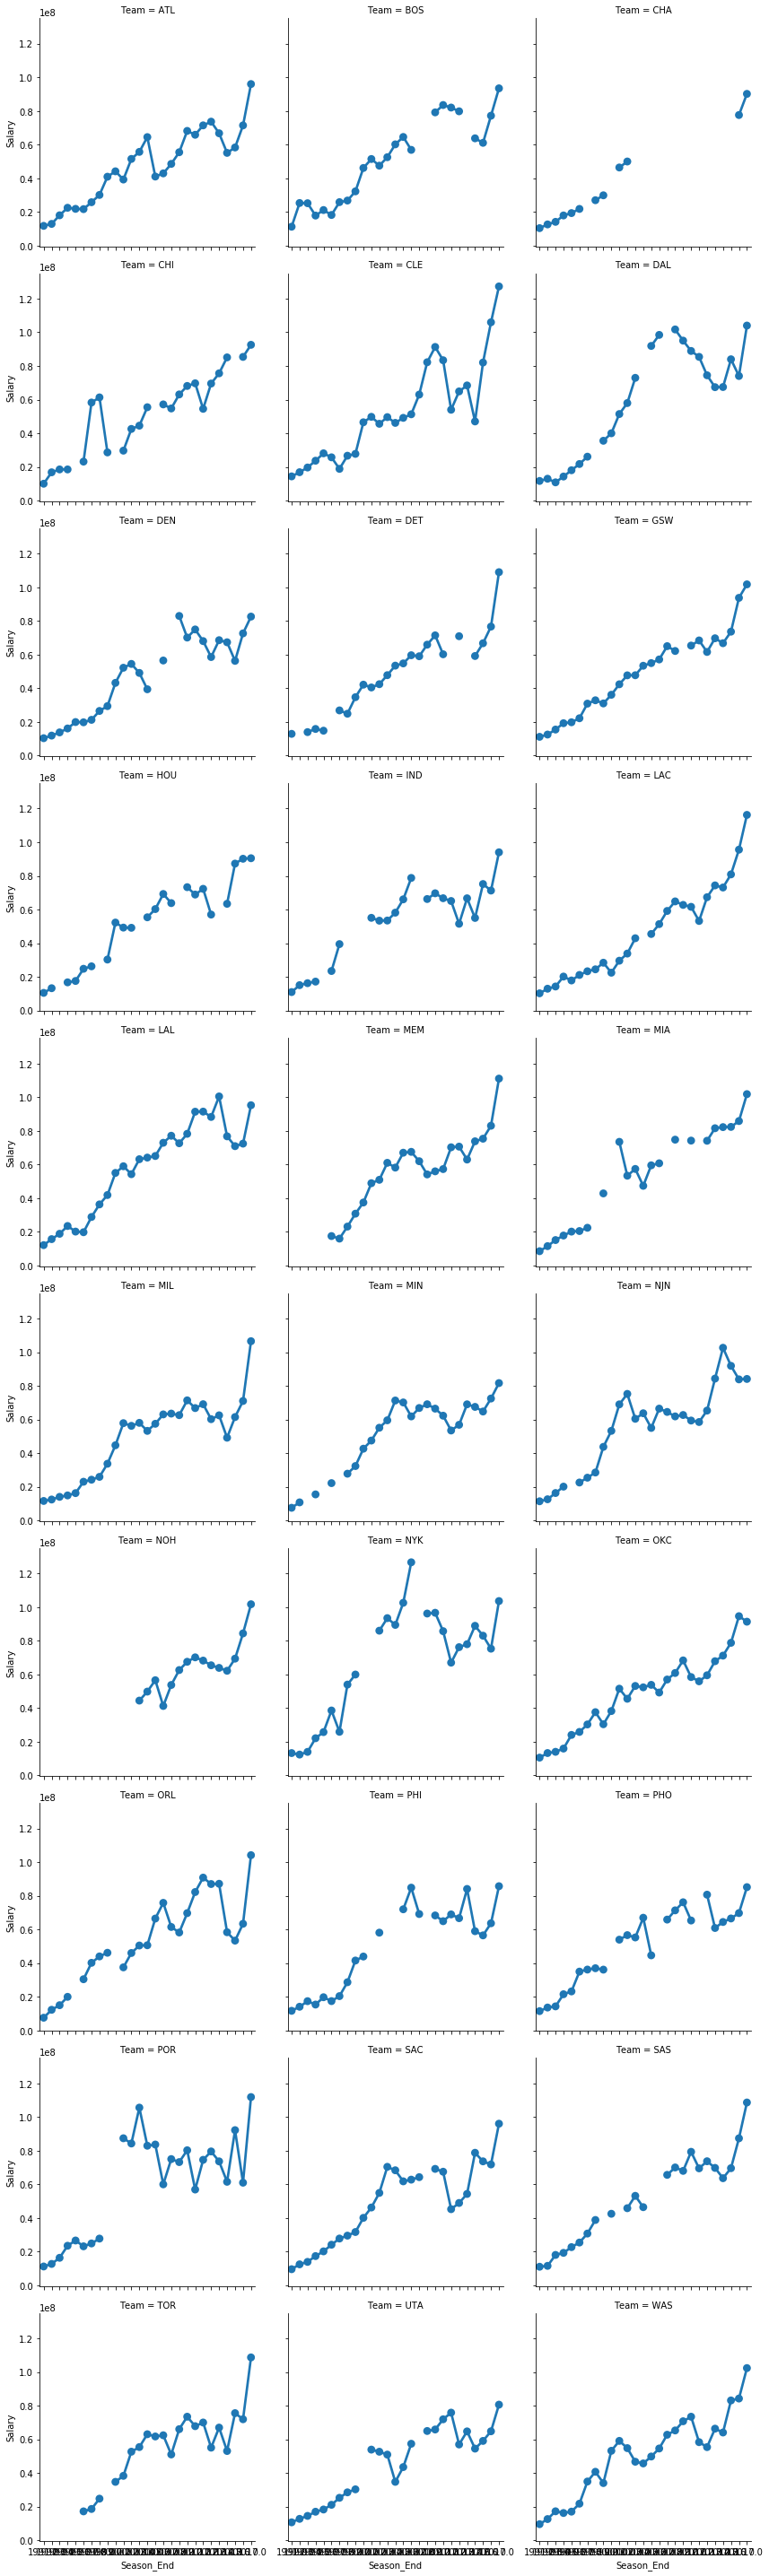

In [20]:
salary_by_year = data.loc[:, ['Team', 'Season_End', 'Salary', 'WinShares']].groupby(['Team', 'Season_End']).sum(axis=1)
salary_by_year.reset_index(inplace=True)

sns.factorplot(x='Season_End', y='Salary', col='Team', col_wrap=3, data=salary_by_year);

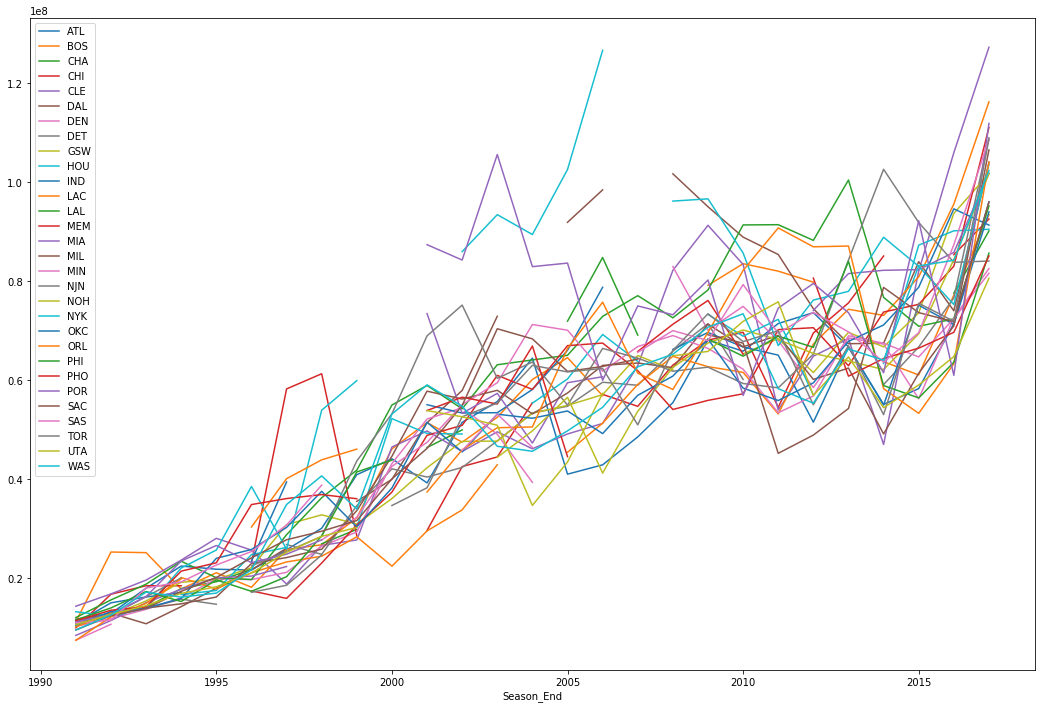

In [21]:
salary_by_year_pivoted = salary_by_year.pivot(index='Season_End', columns = 'Team', values = 'Salary')
#salary_by_year_pivoted
fig, ax = plt.subplots(figsize = (18,12))
salary_by_year_pivoted.plot(ax=ax)
ax.legend();

Salary observations:
- Salary has increased a ton from 1990 - 2017 seasons, which aligns to the salary cap increase: 1990 salary cap was ~11MM
- 2017 season cap was almost $100MM
- Charlotte has a huge gap in the middle because the team moved to New Orleans for a bit

In [19]:
#Add a column for that team's total salary for the year so can look at player sal as % of team


#data['Season_Team'] = data['Stats_SeasonEnd'].map(str) + data['Stats_Team']
#salary_by_year['Season_Team'] = salary_by_year['Season_End'].map(str) + salary_by_year['Team']

#data = data.merge(salary_by_year, on='Season_Team', how = 'left')

#data.columns

#data.drop(['Team_y', 'Season_End_y'], axis=1)

#data.drop(['Team_y', 'Season_End_y'], axis=1)

# Next Steps

- Start to determine key features for comparing salary versus player impact
- Note, probably going to use win shares instead of the real plus/minus, as I could find a pre-scraped dataset that included that rather than having to scrape through all of ESPN's pages (which I started to do in the 'get data' notebook)
- Add a column to the dataframe that is the player's salary as a % of the team's salary for that year

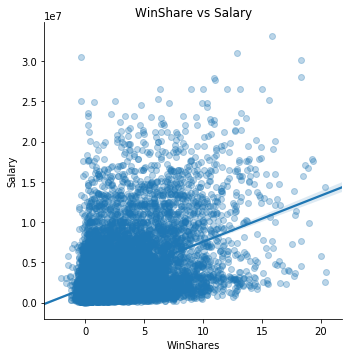

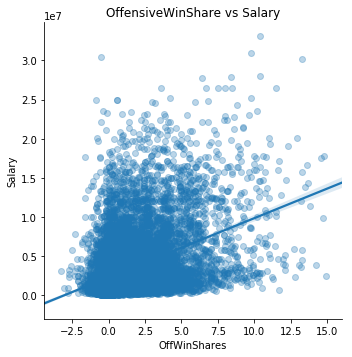

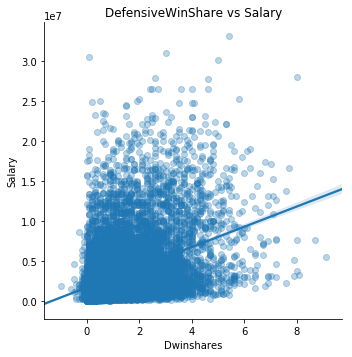

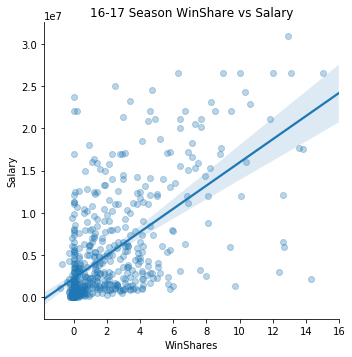

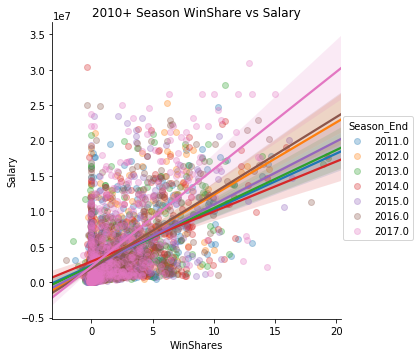

In [107]:
#Salary vs WinShares

morethan70minperseason = data.loc[data.loc[:, 'MinPlayed'] >= 70, :]

sns.lmplot(data=morethan70minperseason, x='WinShares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("WinShare vs Salary")

sns.lmplot(data=morethan70minperseason, x = 'OffWinShares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("OffensiveWinShare vs Salary")

sns.lmplot(data=morethan70minperseason, x = 'Dwinshares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("DefensiveWinShare vs Salary")

sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] == 2017, :], x='WinShares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("16-17 Season WinShare vs Salary");

sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] > 2010, :], 
           x='WinShares', 
           y='Salary', 
           hue = 'Season_End', 
           scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("2010+ Season WinShare vs Salary");

In [21]:
print('Salary vs Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'WinShares']))
print('Salary vs Offensive Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'OffWinShares']))
print('Salary vs Defensive Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'Dwinshares']))

Salary vs Win Share correlation: 0.4475661095700438
Salary vs Offensive Win Share correlation: 0.40743156011816395
Salary vs Defensive Win Share correlation: 0.4102106448158081


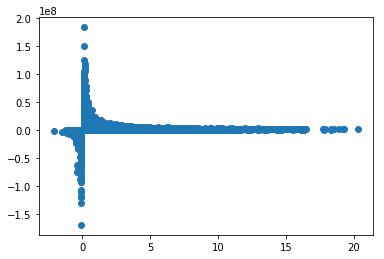

In [22]:
data['Salary_per_Winshare'] = data['Salary'] / data['WinShares']

fig, ax = plt.subplots()
plt.scatter(data=data.loc[data.loc[:, 'Season_End'] > 2000, :], x='WinShares', y='Salary_per_Winshare');

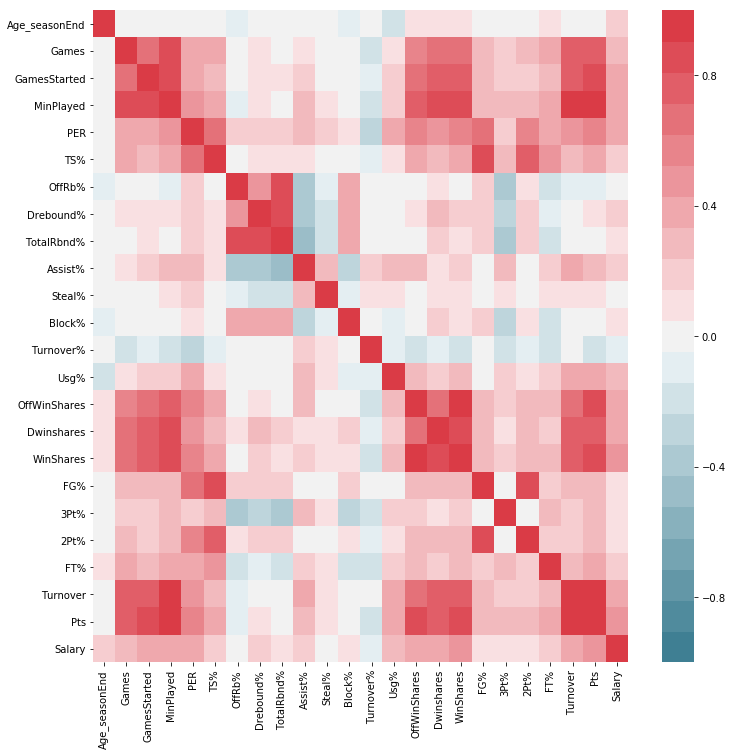

In [23]:
stats_features = [ 'Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'TS%', 'OffRb%', 'Drebound%', 'TotalRbnd%', 'Assist%',
 'Steal%', 'Block%', 'Turnover%', 'Usg%', 'OffWinShares', 'Dwinshares', 'WinShares', 'FG%', '3Pt%',
 '2Pt%','FT%', 'Turnover', 'Pts', 'Salary']

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, stats_features].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);

In [24]:
#Adding shifted win shares & salary columns to get correlations/start modeling...

data['next_season_salary'] = data.groupby(['Player'])['Salary'].shift(-1)
data['next_season_winshares'] = data.groupby(['Player'])['WinShares'].shift(-1)
data['next_season_off_winshares'] = data.groupby(['Player'])['OffWinShares'].shift(-1)
data['next_season_def_winshares'] = data.groupby(['Player'])['Dwinshares'].shift(-1)

print('Winshares vs next season salary:', data.loc[:, 'WinShares'].corr(data.loc[:, 'next_season_salary']))
print('Defensive Winshares vs next season salary:', data.loc[:, 'OffWinShares'].corr(data.loc[:, 'next_season_salary']))
print('Offensive Winshares vs next season salary:', data.loc[:, 'Dwinshares'].corr(data.loc[:, 'next_season_salary']))


Winshares vs next season salary: 0.49767118617385003
Defensive Winshares vs next season salary: 0.4584275725519203
Offensive Winshares vs next season salary: 0.4425756714101926


C:\Users\testr\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


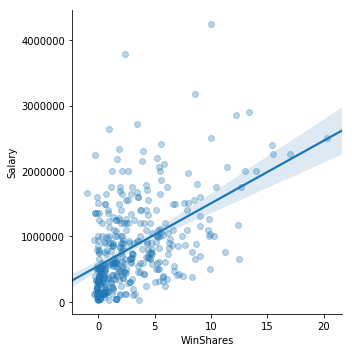

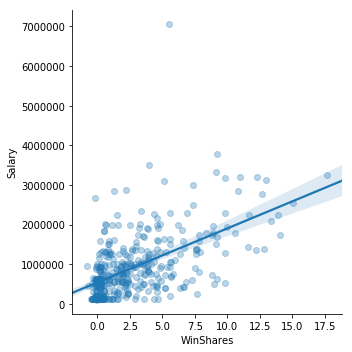

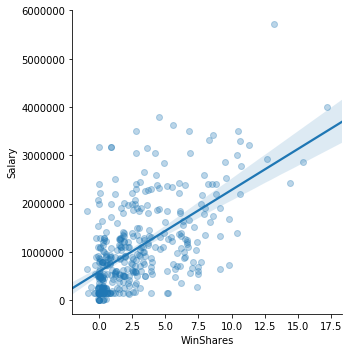

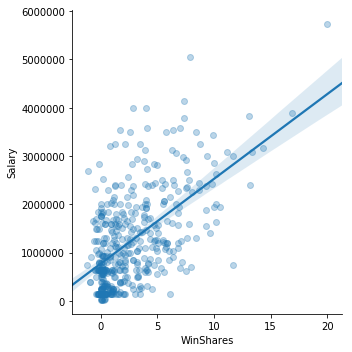

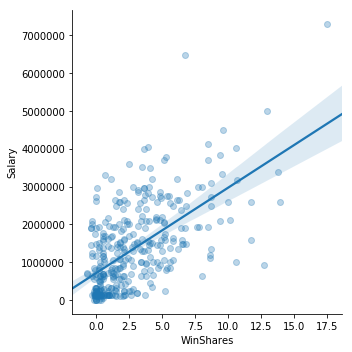

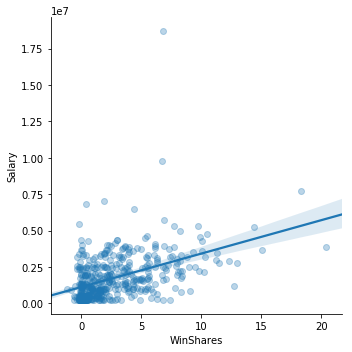

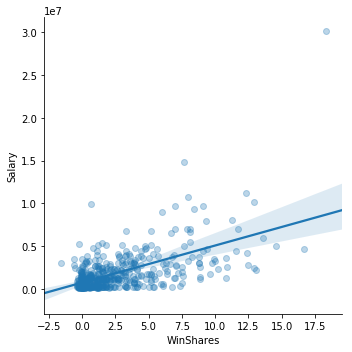

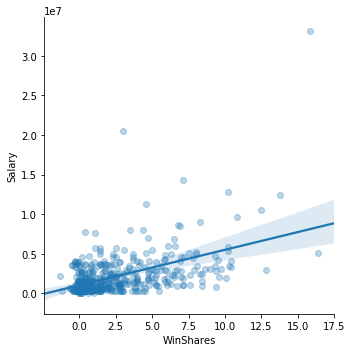

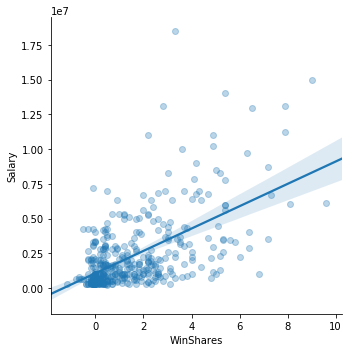

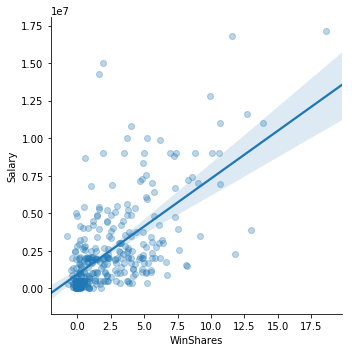

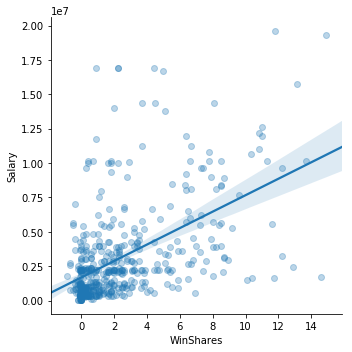

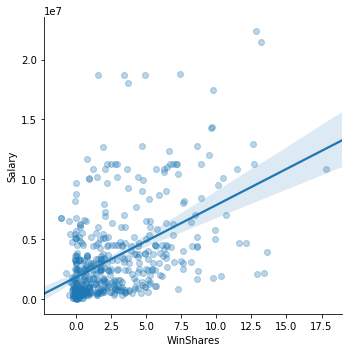

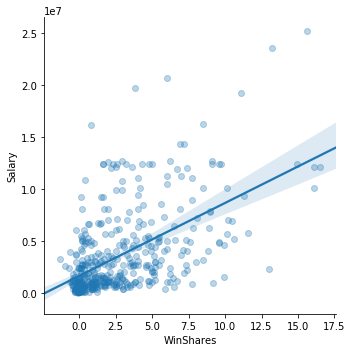

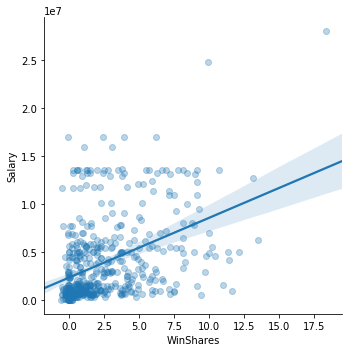

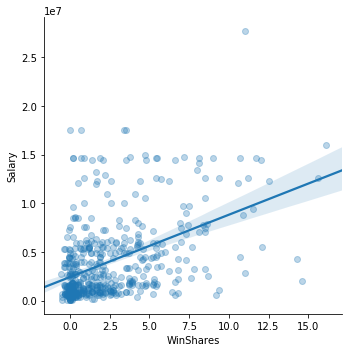

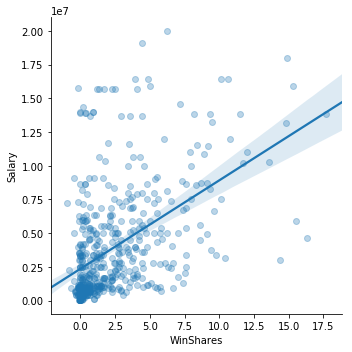

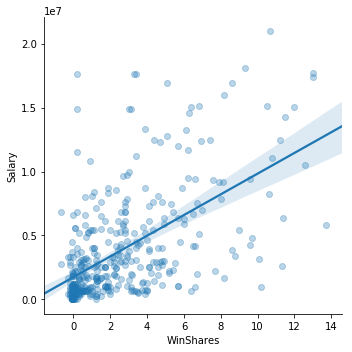

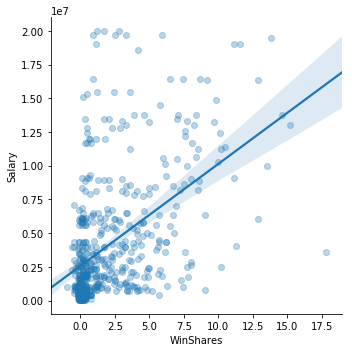

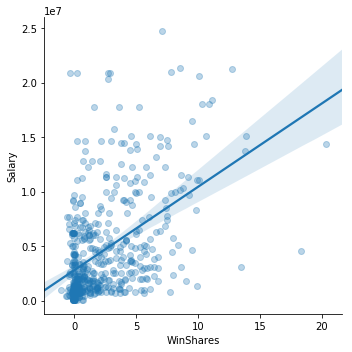

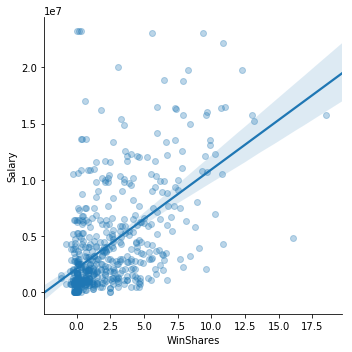

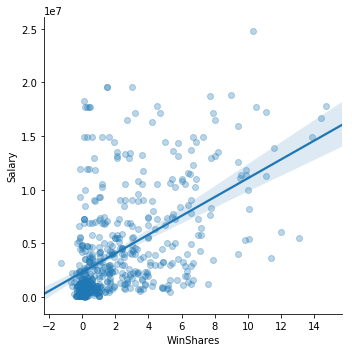

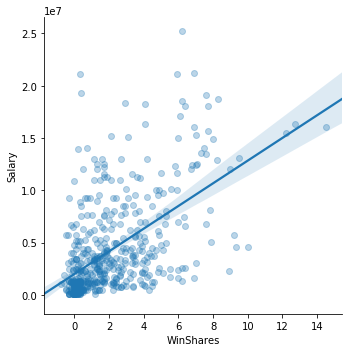

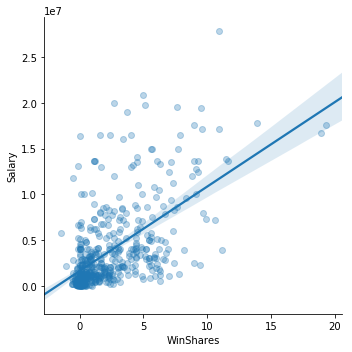

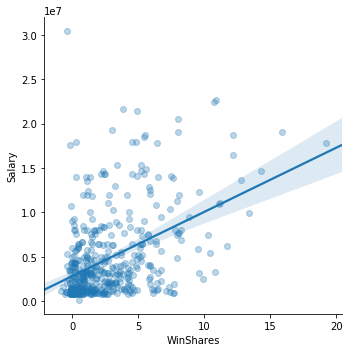

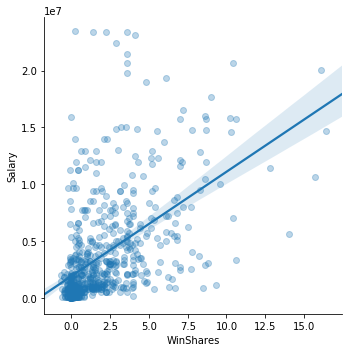

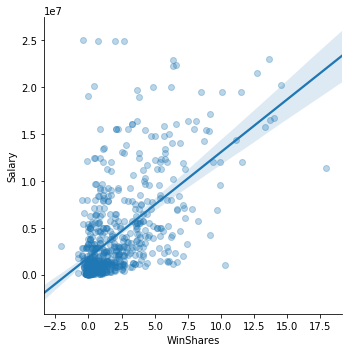

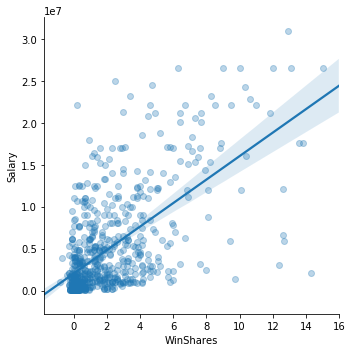

In [25]:
#lmplot by season:
for year in range(1991, 2018):
    sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] == year, :], x='WinShares', y='Salary', scatter_kws={'alpha':0.3})

C:\Users\testr\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


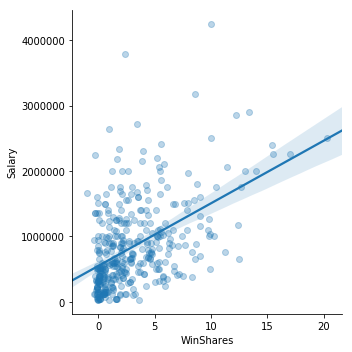

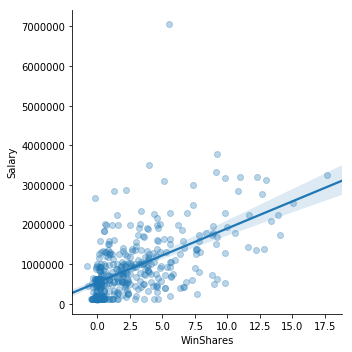

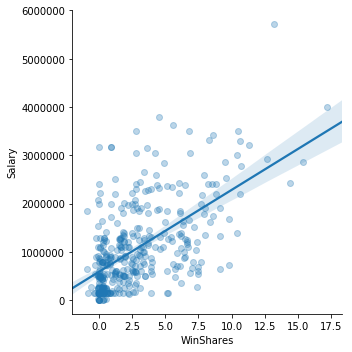

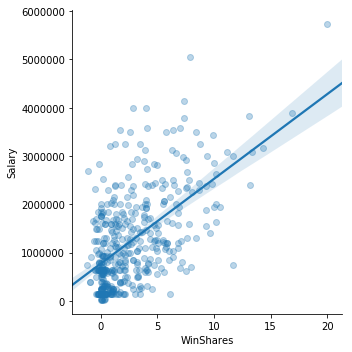

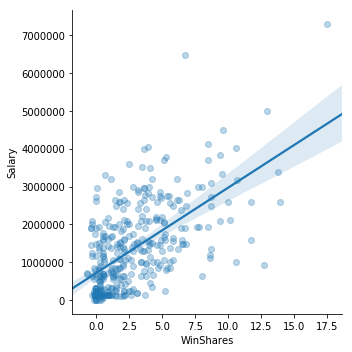

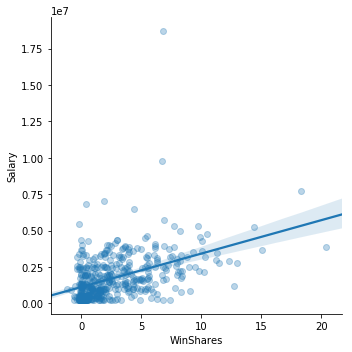

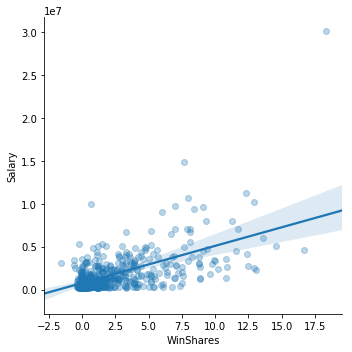

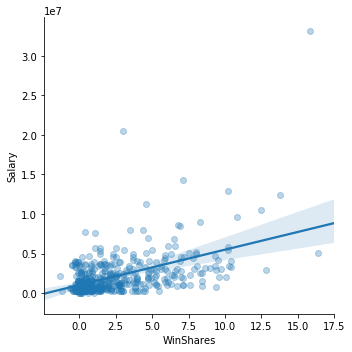

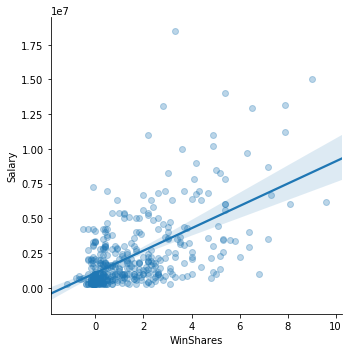

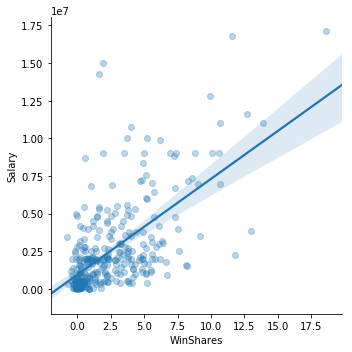

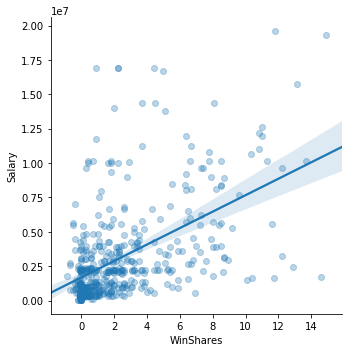

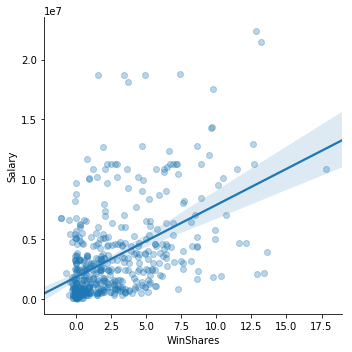

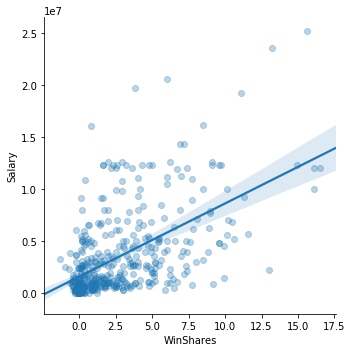

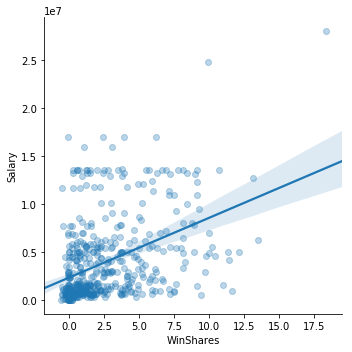

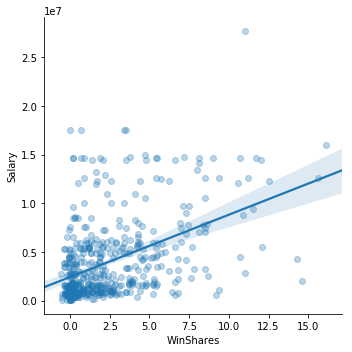

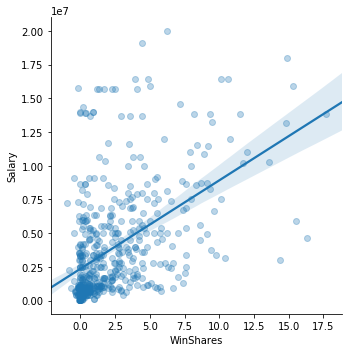

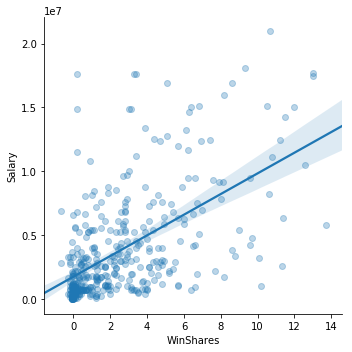

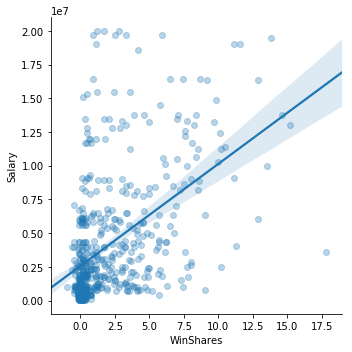

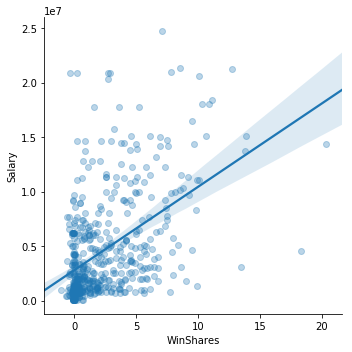

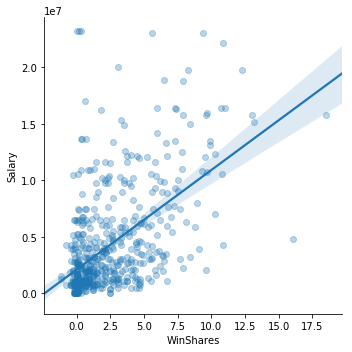

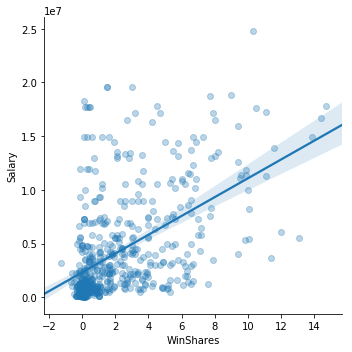

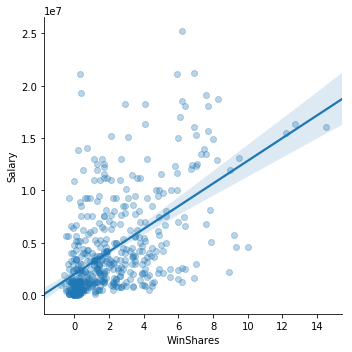

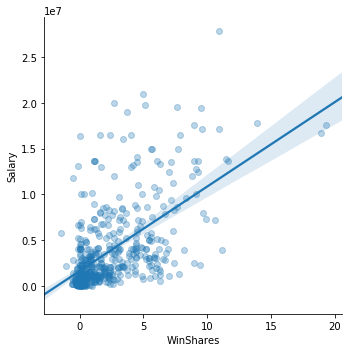

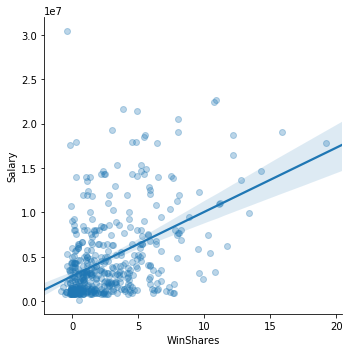

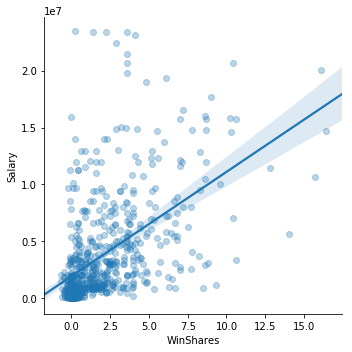

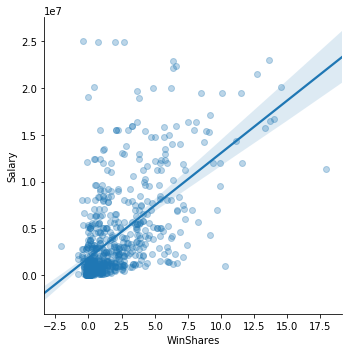

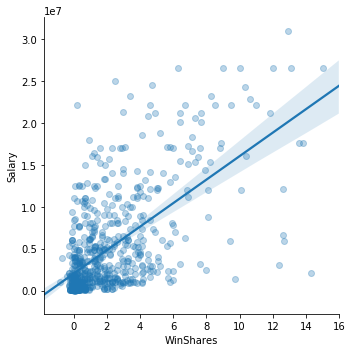

In [26]:
#linreg by season:
for year in range(1991, 2018):
    sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] == year, :], x='WinShares', y='Salary', scatter_kws={'alpha':0.3})

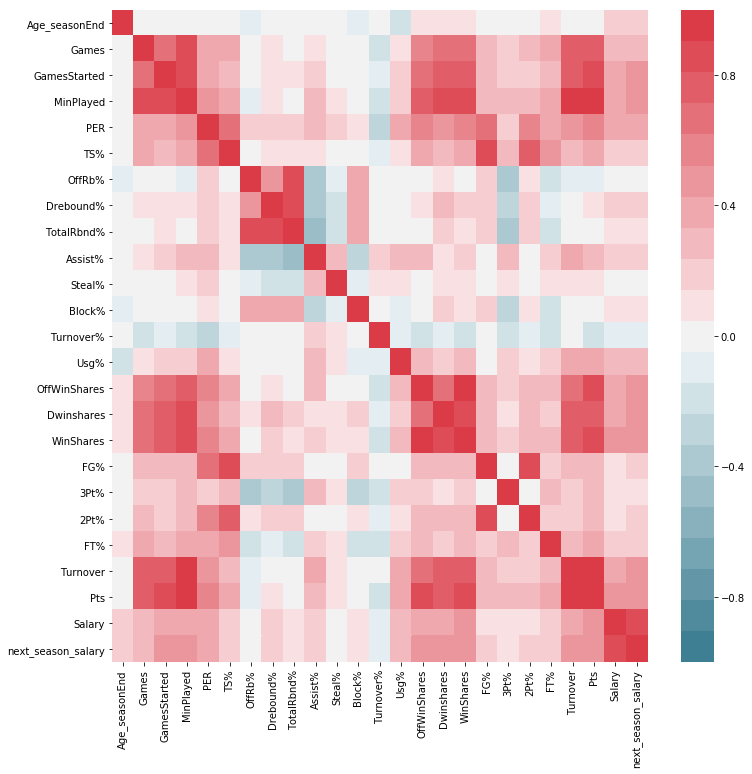

In [27]:
stats_features = ['Position','Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'TS%', 'OffRb%', 'Drebound%', 'TotalRbnd%', 'Assist%',
 'Steal%', 'Block%', 'Turnover%', 'Usg%', 'OffWinShares', 'Dwinshares', 'WinShares', 'FG%', '3Pt%',
 '2Pt%','FT%', 'Turnover', 'Pts', 'Salary', 'next_season_salary']

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, stats_features].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

feature_cols = stats_features = ['Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'TS%', 'OffRb%', 'Drebound%', 'TotalRbnd%', 'Assist%',
 'Steal%', 'Block%', 'Turnover%', 'Usg%', 'OffWinShares', 'Dwinshares', 'WinShares', 'FG%', '3Pt%',
 '2Pt%','FT%', 'Turnover', 'Pts']

modeldata = data.loc[data.loc[:, 'next_season_salary'].notnull(), :]

X = modeldata.loc[:, feature_cols]
y = modeldata.loc[:, 'next_season_salary']

scaler = StandardScaler()
X = scaler.fit_transform(X)

linreg = LinearRegression()
linreg.fit(X, y)

print(1- np.mean(cross_val_score(linreg, X, y, cv=10)))


0.6537773244775369


In [29]:
data.head()

Stats_SeasonEnd      Player Position  Age_seasonEnd Stats_Team  Games  \
0           1990.0  A.C. Green       PF           26.0        LAL   82.0   
1           1991.0  A.C. Green       PF           27.0        LAL   82.0   
2           1992.0  A.C. Green       PF           28.0        LAL   82.0   
3           1993.0  A.C. Green       PF           29.0        LAL   82.0   
4           1994.0  A.C. Green       PF           30.0        PHO   82.0   

   GamesStarted  MinPlayed   PER    TS%            ...              \
0          82.0     2709.0  14.7  0.548            ...               
1          21.0     2164.0  13.8  0.556            ...               
2          53.0     2902.0  16.7  0.556            ...               
3          55.0     2819.0  16.3  0.603            ...               
4          55.0     2825.0  17.0  0.555            ...               

       player        Salary  Season_End  Season_Start  Team  \
0         NaN  3.642391e+06         NaN           NaN   NaN   
1  A.C. Green  1.750000e+06      1991.0        1990.0   LAL   
2  A.C. Green  1.750000e+06      1992.0        1991.0   LAL   
3  A.C. Green  1.750000e+06      1993.0        1992.0   LAL   
4  A.C. Green  1.885000e+06      1994.0        1993.0   PHO   

   Salary_per_Winshare  next_season_salary  next_season_winshares  \
0        473037.748918           1750000.0                    6.1   
1        286885.245902           1750000.0                    8.8   
2        198863.636364           1750000.0                    8.6   
3        203488.372093           1885000.0                    9.3   
4        202688.172043           6472600.0                    6.7   

   next_season_off_winshares  next_season_def_winshares  
0                        3.2                        2.9  
1                        5.8                        2.9  
2                        6.1                        2.6  
3                        6.7                        2.6  
4                        4.6                        2.1  

[5 rows x 52 columns]

In [30]:
# Turn position into dummy variables to use in model

In [22]:
data.Position.value_counts()

position_map = {'PF': 1, 'PG': 2, 'C': 3, 'SG': 4, 'SF': 5, 'PG-SG': 6, 'SG-PG': 6, 'SG-SF': 7, 'SF-SG': 7,
               'C-PF': 8, 'PF-SF': 9, 'PF-C':8, 'SF-PF': 9, 'SG-PF': 10, 'C-SF': 11, 'PG-SF':1}

data['Position_Mapped'] = data['Position'].map(position_map)

In [23]:
data.head()

Stats_SeasonEnd      Player Position  Age_seasonEnd Stats_Team  Games  \
0           1990.0  A.C. Green       PF           26.0        LAL   82.0   
1           1991.0  A.C. Green       PF           27.0        LAL   82.0   
2           1992.0  A.C. Green       PF           28.0        LAL   82.0   
3           1993.0  A.C. Green       PF           29.0        LAL   82.0   
4           1994.0  A.C. Green       PF           30.0        PHO   82.0   

   GamesStarted  MinPlayed   PER    TS%       ...         Blocks  Turnover  \
0          82.0     2709.0  14.7  0.548       ...           50.0     116.0   
1          21.0     2164.0  13.8  0.556       ...           23.0      99.0   
2          53.0     2902.0  16.7  0.556       ...           36.0     111.0   
3          55.0     2819.0  16.3  0.603       ...           39.0     116.0   
4          55.0     2825.0  17.0  0.555       ...           38.0     100.0   

   PersonalFouls     Pts      player     Salary  Season_End  Season_Start  \
0          207.0  1061.0         NaN  3400668.8         NaN           NaN   
1          117.0   750.0  A.C. Green  1750000.0      1991.0        1990.0   
2          141.0  1116.0  A.C. Green  1750000.0      1992.0        1991.0   
3          149.0  1051.0  A.C. Green  1750000.0      1993.0        1992.0   
4          142.0  1204.0  A.C. Green  1885000.0      1994.0        1993.0   

   Team  Position_Mapped  
0   NaN              1.0  
1   LAL              1.0  
2   LAL              1.0  
3   LAL              1.0  
4   PHO              1.0  

[5 rows x 48 columns]